<a href="https://colab.research.google.com/github/srikarreddykatta/playrepo/blob/main/210150012_data_visualisation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from plotnine import *
import pandas as pd


In [71]:
df= pd.read_csv("air_pol_allstates.csv")
df = df.drop(columns=['last_update'])
df = df.drop(columns=['latitude'])
df = df.drop(columns=['longitude'])
df = df.dropna()
df = df.drop(columns=['country'])
df

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",CO,37.0,52.0,44.0
1,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",PM10,42.0,96.0,69.0
2,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",NO2,3.0,10.0,5.0
3,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",CO,12.0,18.0,15.0
4,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NH3,3.0,12.0,6.0
...,...,...,...,...,...,...,...
3295,West_Bengal,Kolkata,"Fort William, Kolkata - WBPCB",CO,32.0,102.0,71.0
3296,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",SO2,6.0,34.0,16.0
3297,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",PM2.5,71.0,173.0,96.0
3298,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",CO,20.0,62.0,37.0


In [72]:

population_densities = {
    'Andhra_Pradesh': 33647,
    'Arunachal_Pradesh': 1875,
    'Assam': 48412,
    'Bihar': 132536,
    'Chandigarh': 1016228,
    'Chhattisgarh': 21773,
    'Delhi': 1260842,
    'Gujarat': 32584,
    'Haryana': 63794,
    'Himachal Pradesh': 13385,
    'Jharkhand': 48415,
    'Karnataka': 35227,
    'Kerala': 91860,
    'Madhya Pradesh': 27691,
    'Maharashtra': 40019,
    'Manipur': 13834,
    'Meghalaya': 14818,
    'Mizoram': 5878,
    'Nagaland': 13570,
    'Odisha': 29750,
    'Punjab': 59849,
    'Rajasthan': 23675,
    'Sikkim': 9728,
    'TamilNadu': 59851,
    'Telangana': 34276,
    'Uttar_Pradesh': 97779,
    'Uttarakhand': 21004,
    'West_Bengal': 112233,
    'Puducherry': 287297,
    'Tripura': 39743
}

# Add population density column to the DataFrame
df['population_density'] = df['state'].map(population_densities)



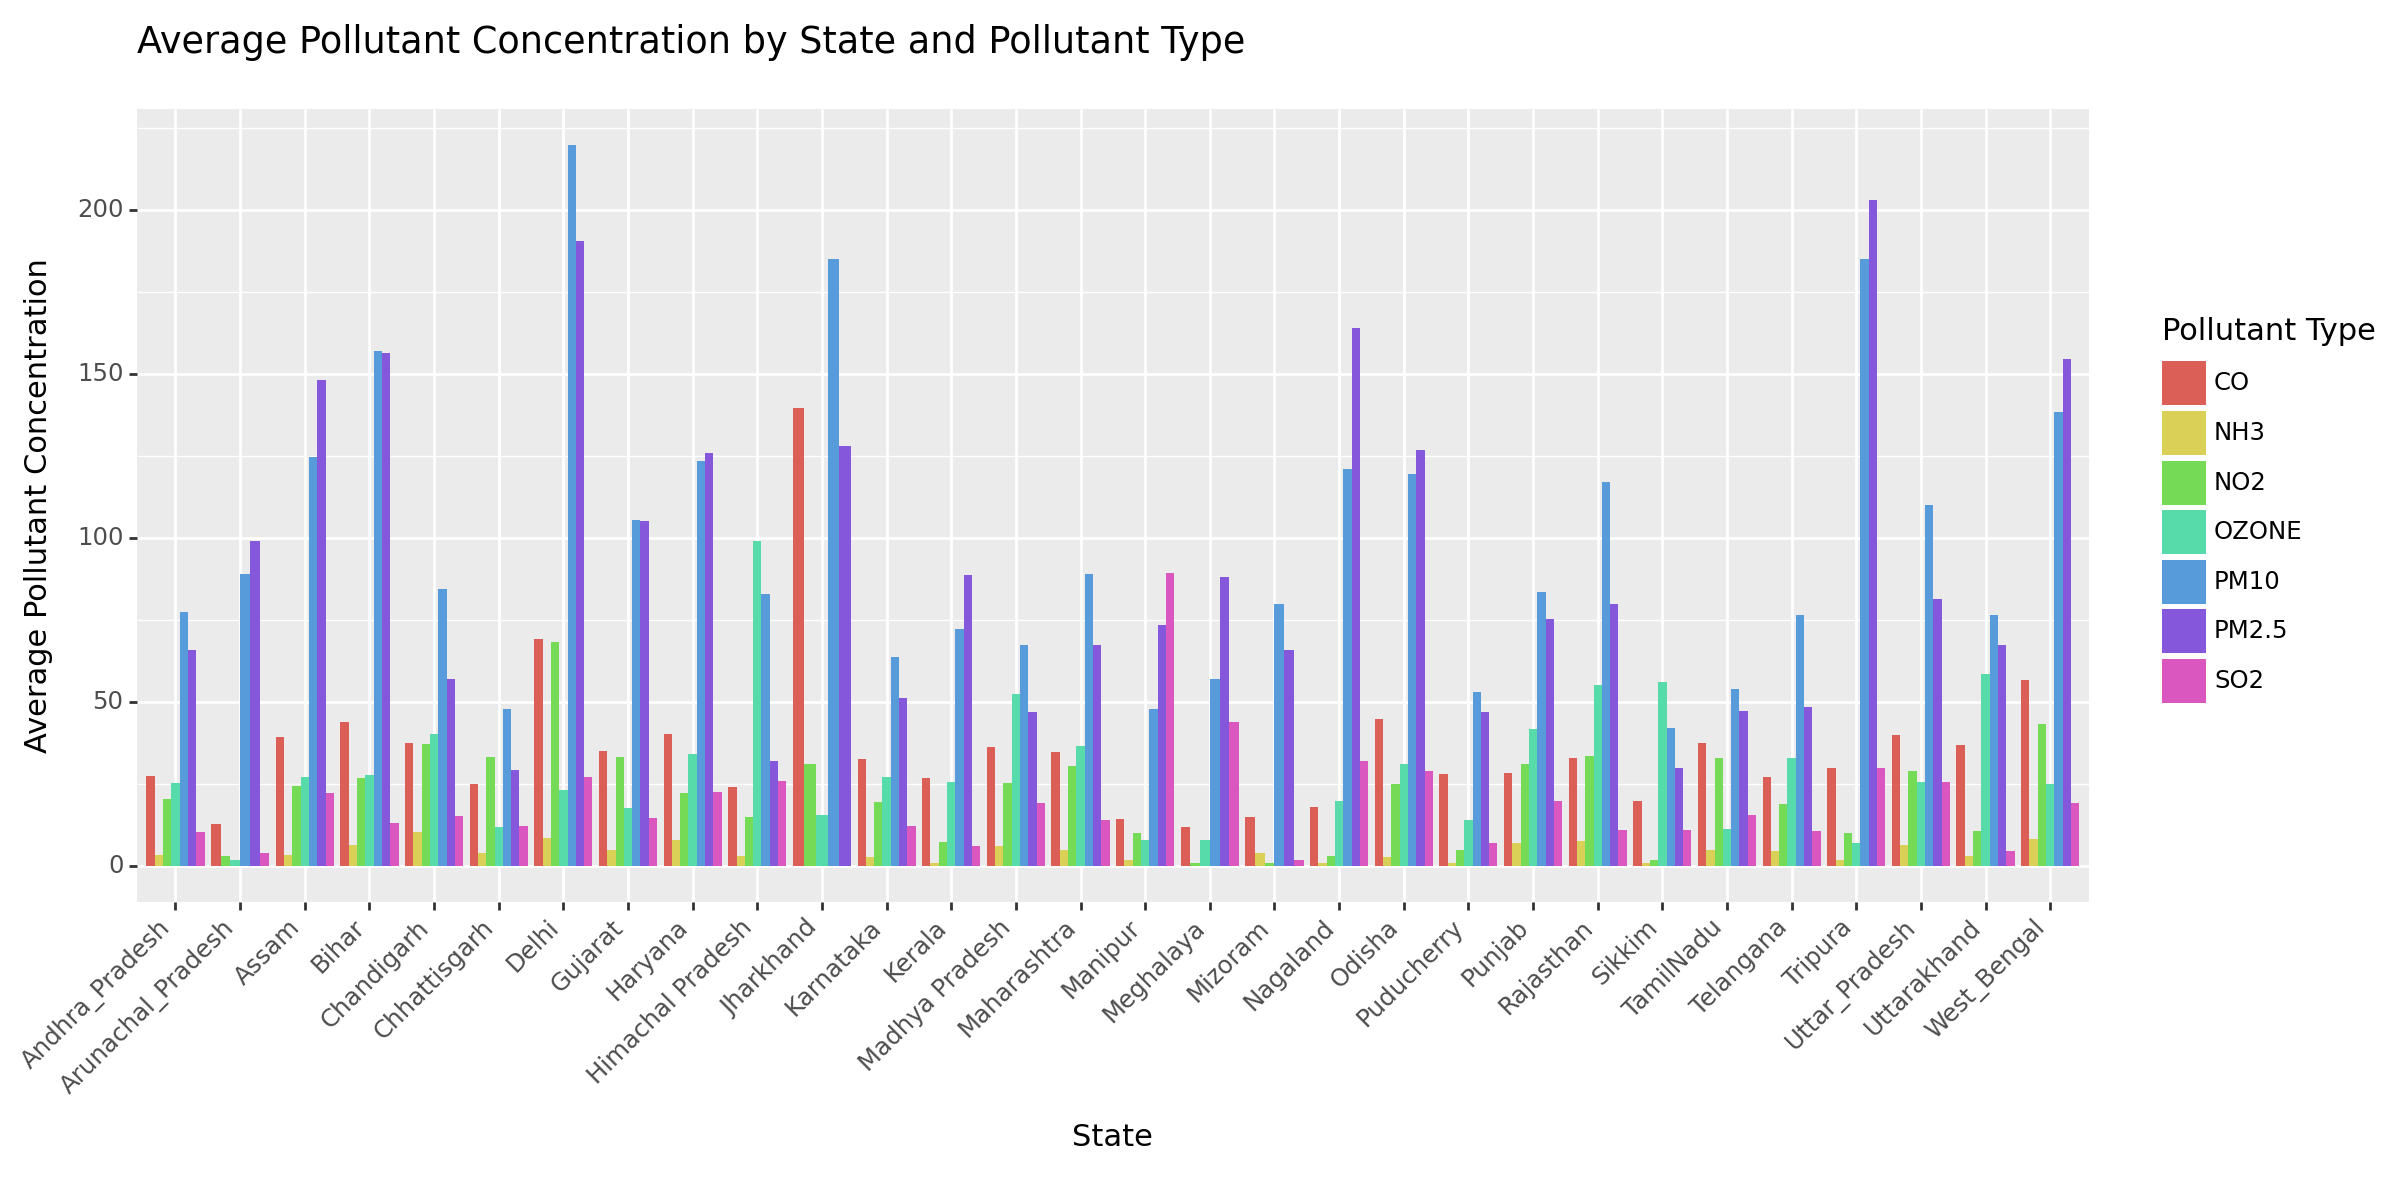

<Figure Size: (1200 x 600)>

In [73]:

# Group by 'state' and 'pollutant_id', then calculate the average pollutant_avg
avg_pollutant_by_state = df.groupby(['state', 'pollutant_id'])['pollutant_avg'].mean().reset_index()

p = (
    ggplot(avg_pollutant_by_state, aes(x='state', y='pollutant_avg', fill='pollutant_id')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Average Pollutant Concentration by State and Pollutant Type',
         x='State',
         y='Average Pollutant Concentration',
         fill='Pollutant Type') +
    theme(axis_text_x=element_text(angle=45, hjust=1),
          figure_size=(12, 6))  # Adjust the figure size here
)

p


The high levels of PM10 (Particulate Matter with a diameter of 10 micrometers or less) in Delhi can be attributed to several factors, including:

Vehicle Emissions: Delhi faces significant air pollution from vehicular emissions. The city has a large number of vehicles, including both personal and commercial vehicles, which contribute to the release of PM10 particles into the air through exhaust emissions and road dust.

Industrial Activity: Delhi is a major industrial hub with various manufacturing units and industrial activities. Industrial processes can emit particulate matter into the atmosphere, contributing to PM10 levels, especially in areas with high industrial activity.

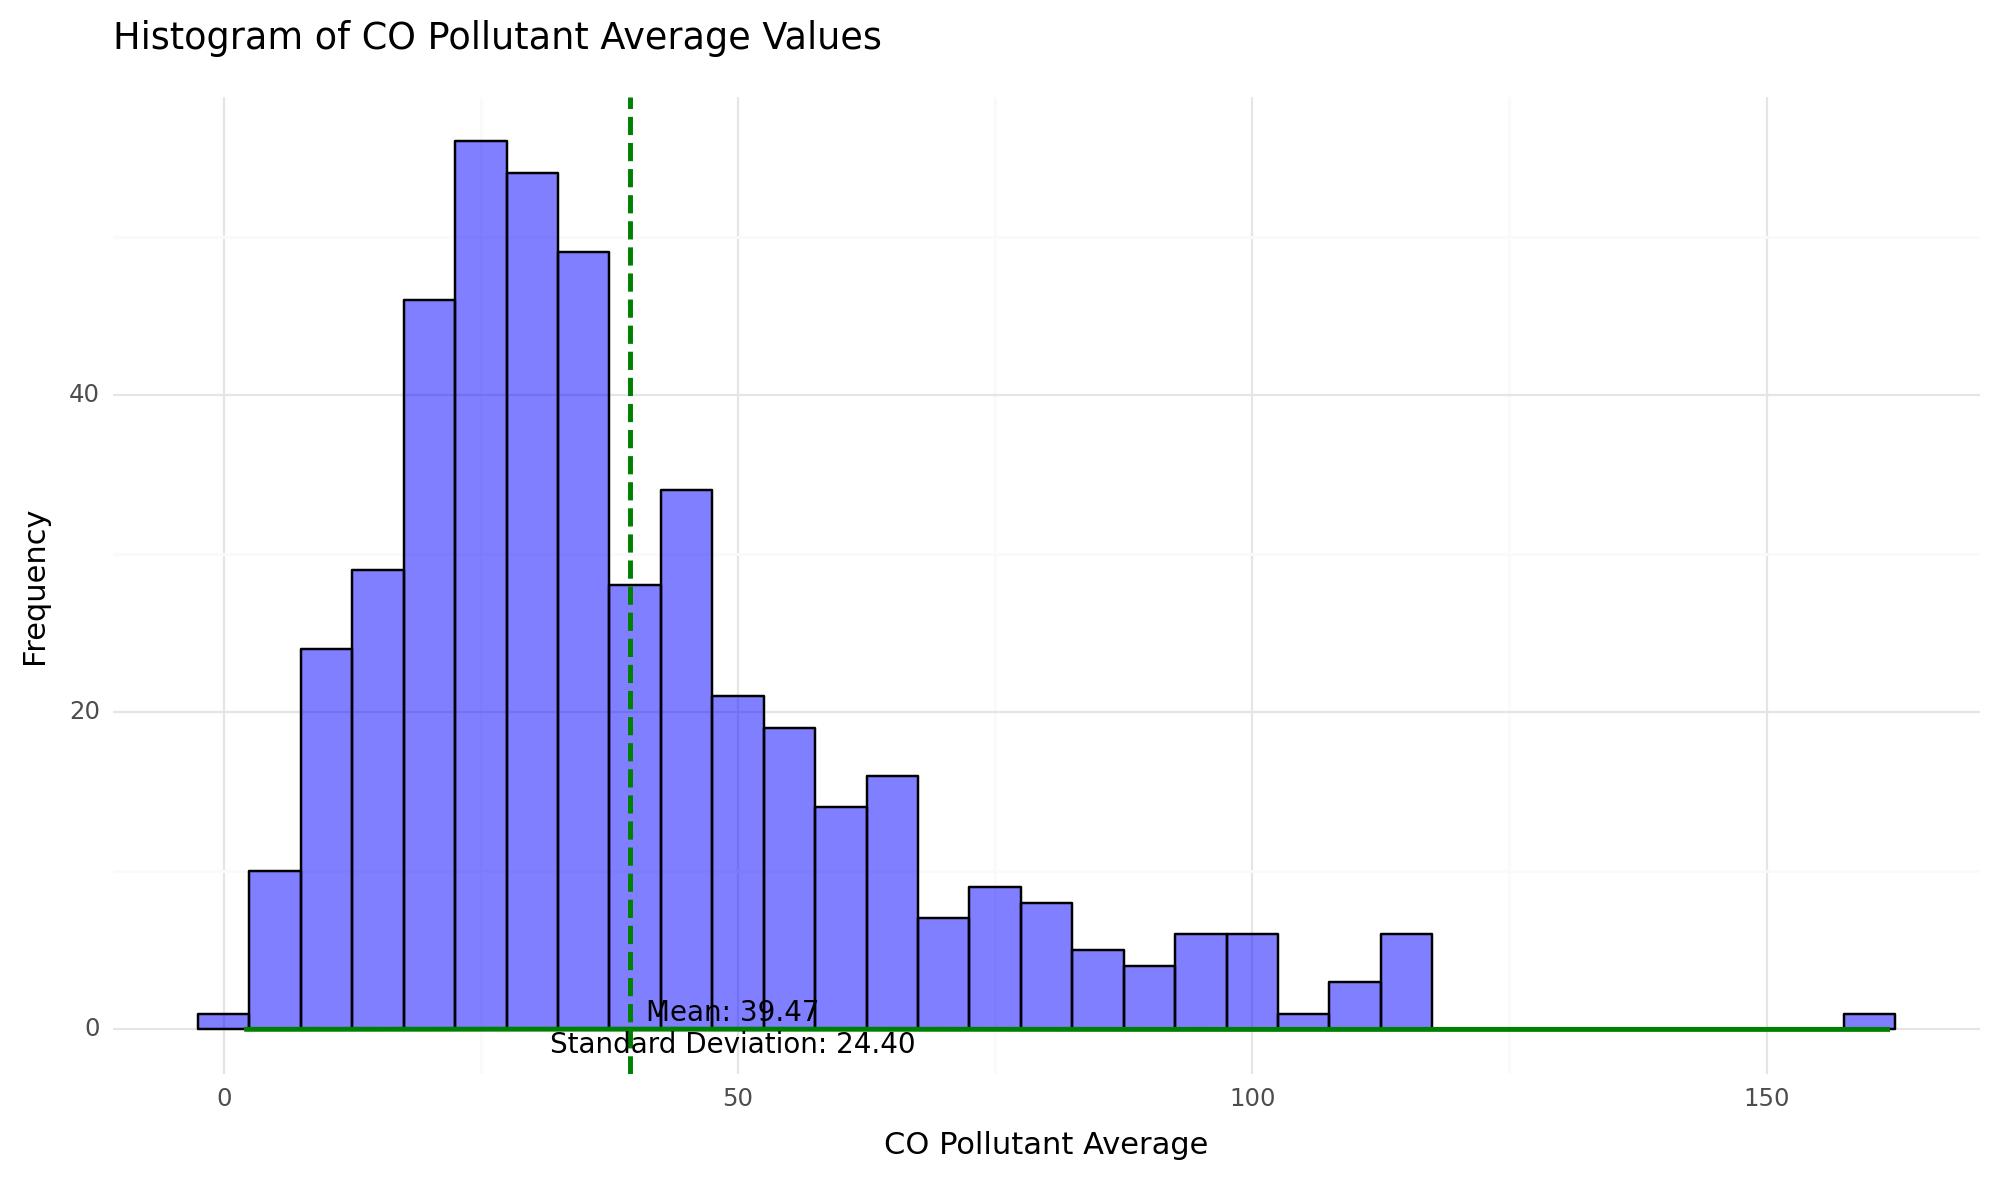

<Figure Size: (1000 x 600)>

In [74]:
import numpy as np
from scipy.stats import norm
# scipy is imported for the normal fitting
# Assuming df contains the dataframe with pollutant_avg values for CO

df_co = df[df['pollutant_id'] == 'CO']

p = (ggplot(df_co, aes(x='pollutant_avg')) +
     geom_histogram(binwidth=5, fill='blue', color='black', alpha=0.5) +
     geom_density(aes(x='pollutant_avg'), linetype='dotted', color='red') +
     labs(x='CO Pollutant Average', y='Frequency', title='Histogram of CO Pollutant Average Values') +
     theme_minimal() +
     theme(figure_size=(10, 6)))

# Fit a normal distribution to the data
mu, std = norm.fit(df_co['pollutant_avg'])

# Plot the normal distribution
x = np.linspace(df_co['pollutant_avg'].min(), df_co['pollutant_avg'].max(), 100)
y = norm.pdf(x, mu, std)
df_norm = pd.DataFrame({'x': x, 'y': y})
p += geom_line(data=df_norm, mapping=aes(x='x', y='y'), color='green', size=1)  # Corrected syntax here
p += geom_vline(xintercept=[mu], linetype='dashed', color='green', size=1)
p += annotate("text", x=mu + 10, y=max(y) * 0.8, label=f"Mean: {mu:.2f}\nStandard Deviation: {std:.2f}", size=10)

p

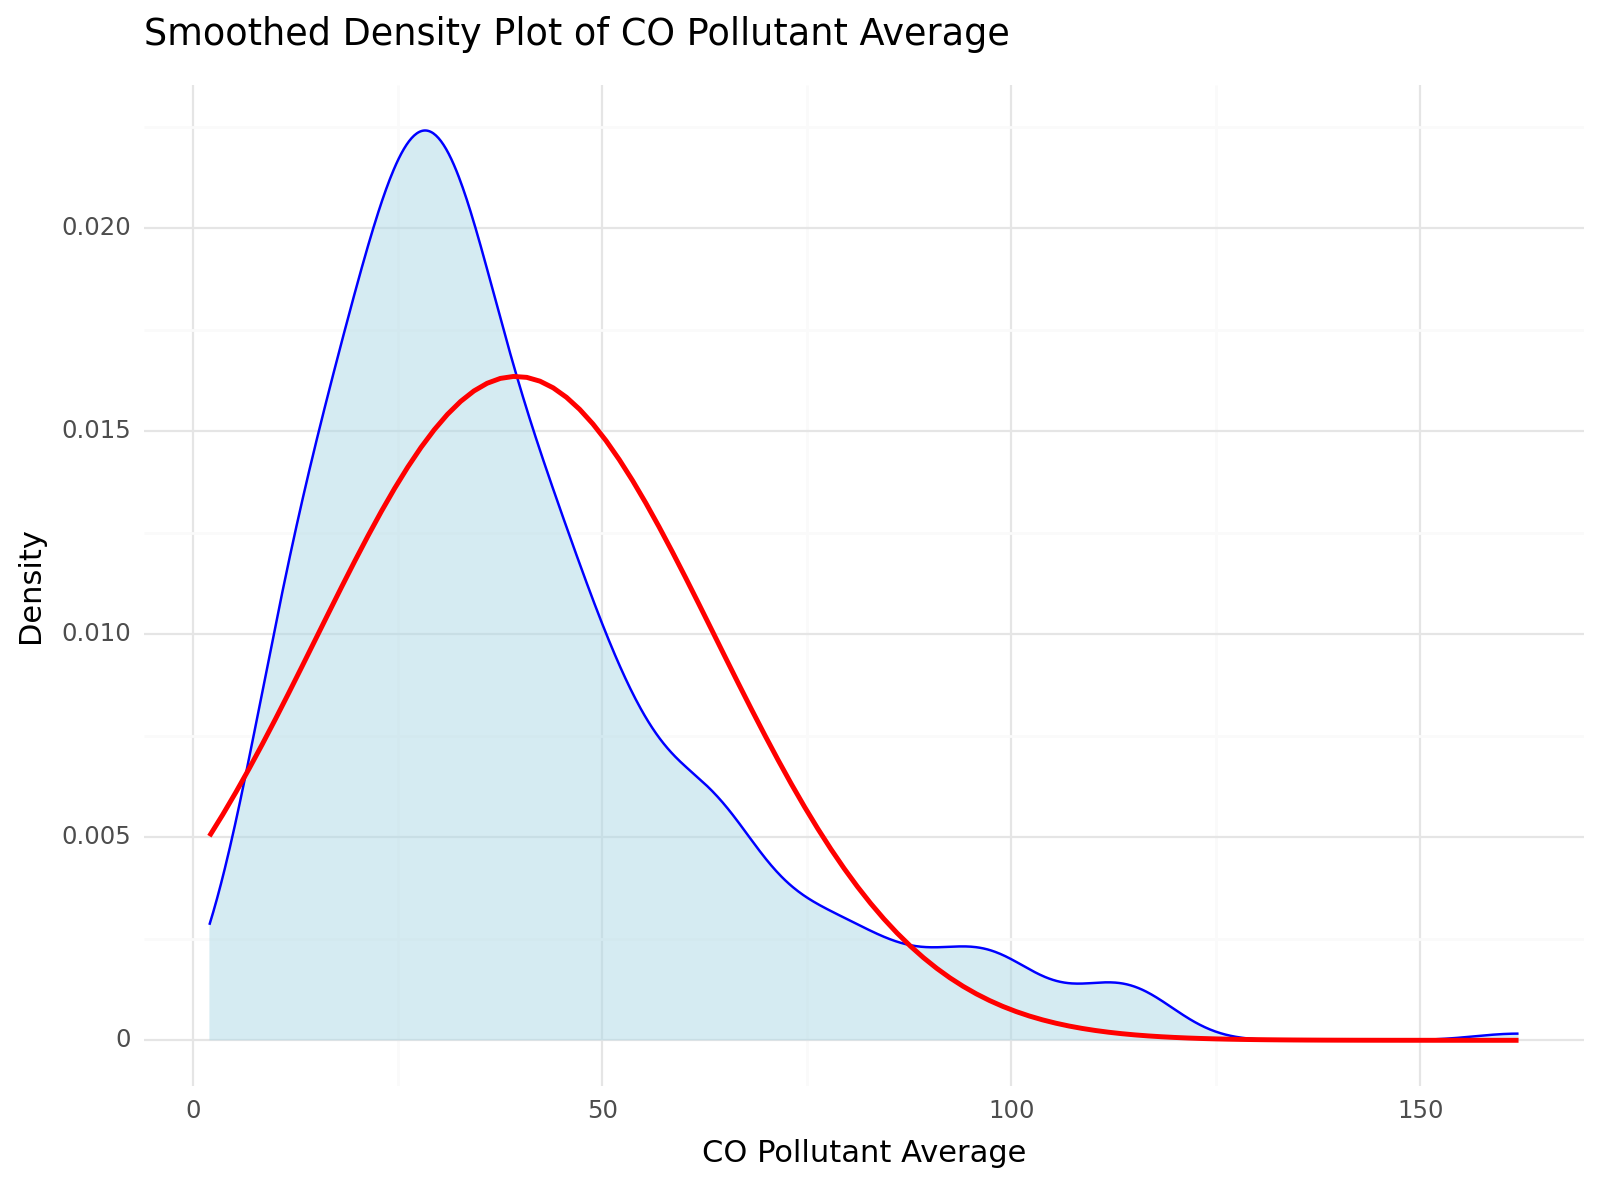

<Figure Size: (800 x 600)>

In [75]:
df_co = df[df['pollutant_id'] == 'CO']
mu, std = norm.fit(df_co['pollutant_avg'])

# Plot the smoothed density plot for CO pollutant_avg
p = (ggplot(df_co, aes(x='pollutant_avg')) +
     geom_density(color='blue', fill='lightblue', alpha=0.5) +
     labs(x='CO Pollutant Average', y='Density', title='Smoothed Density Plot of CO Pollutant Average') +
     theme_minimal() +
     theme(figure_size=(8, 6)))

# Plot the theoretical normal distribution curve
x = np.linspace(df_co['pollutant_avg'].min(), df_co['pollutant_avg'].max(), 100)
y = norm.pdf(x, mu, std)
df_norm = pd.DataFrame({'x': x, 'y': y})
p += geom_line(data=df_norm, mapping=aes(x='x', y='y'), color='red', size=1)

p


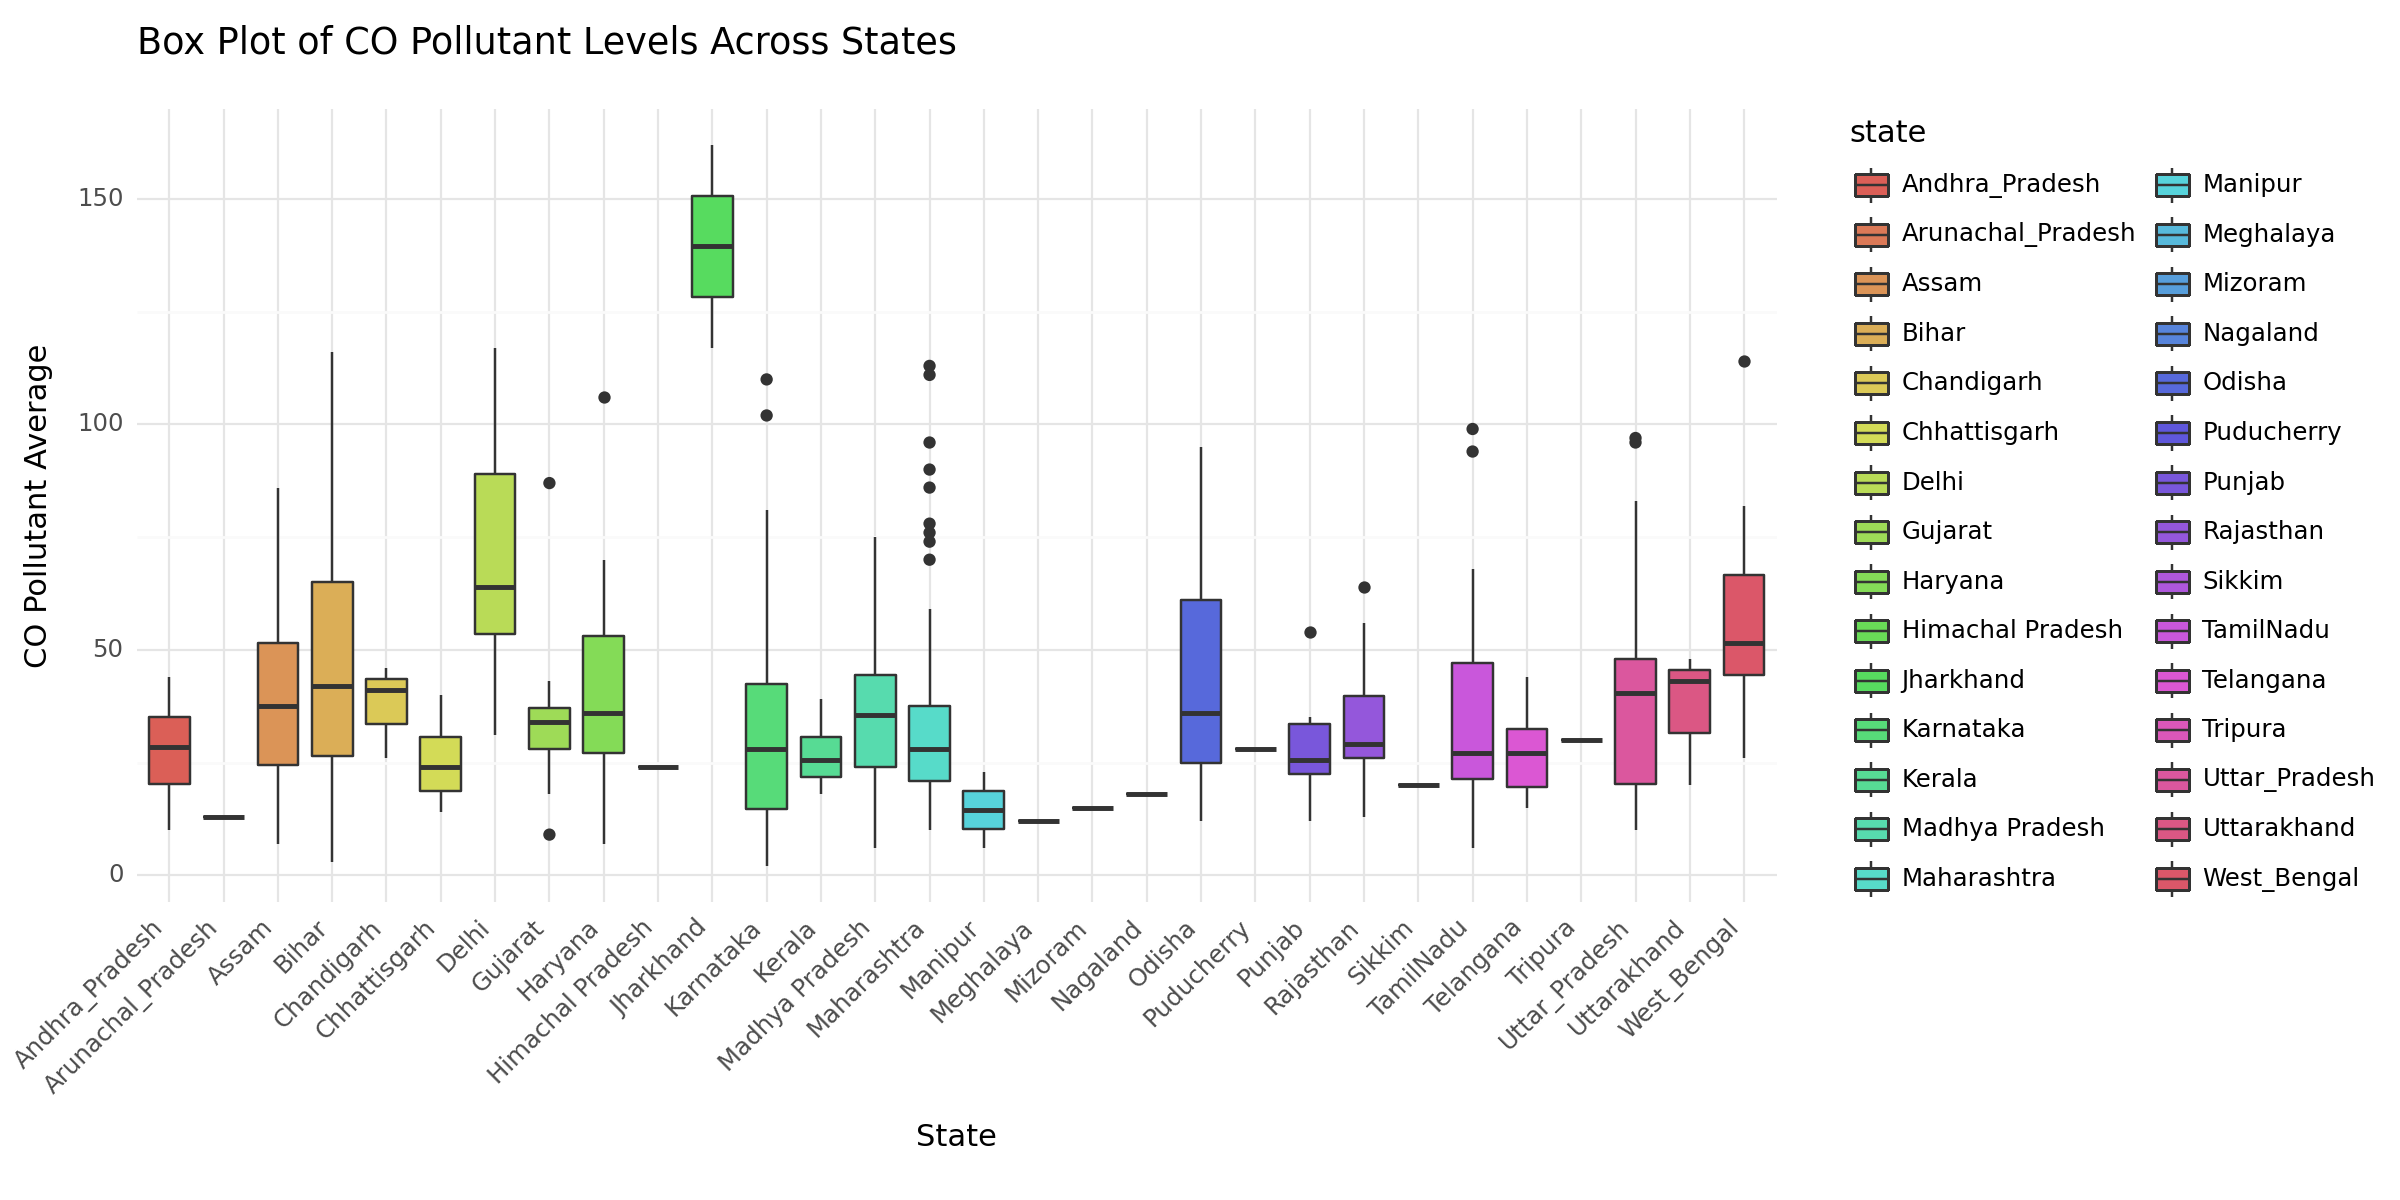

In [76]:

df_co = df[df['pollutant_id'] == 'CO']

# Create box plot
boxplot_co_states = (
    ggplot(df_co, aes(x='state', y='pollutant_avg', fill='state')) +
    geom_boxplot() +
    labs(title='Box Plot of CO Pollutant Levels Across States', x='State', y='CO Pollutant Average') +
    theme_minimal() +
    theme(figure_size=(12, 6),
          axis_text_x=element_text(angle=45, hjust=1))
)

print(boxplot_co_states)


more number of outliers are seen in the states like maharastra ,karnataka, and tamilnadu . This may possibly indicate that how the regions are diversified ie cities like banglore , karnataka , and pune, mumbai showing way more pollution and carbon monoxide emmission than other parts of the respective states which in some ways give the picture of vehicles / traffic

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 6 values. 7 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 6 values. 7 were requested from it.


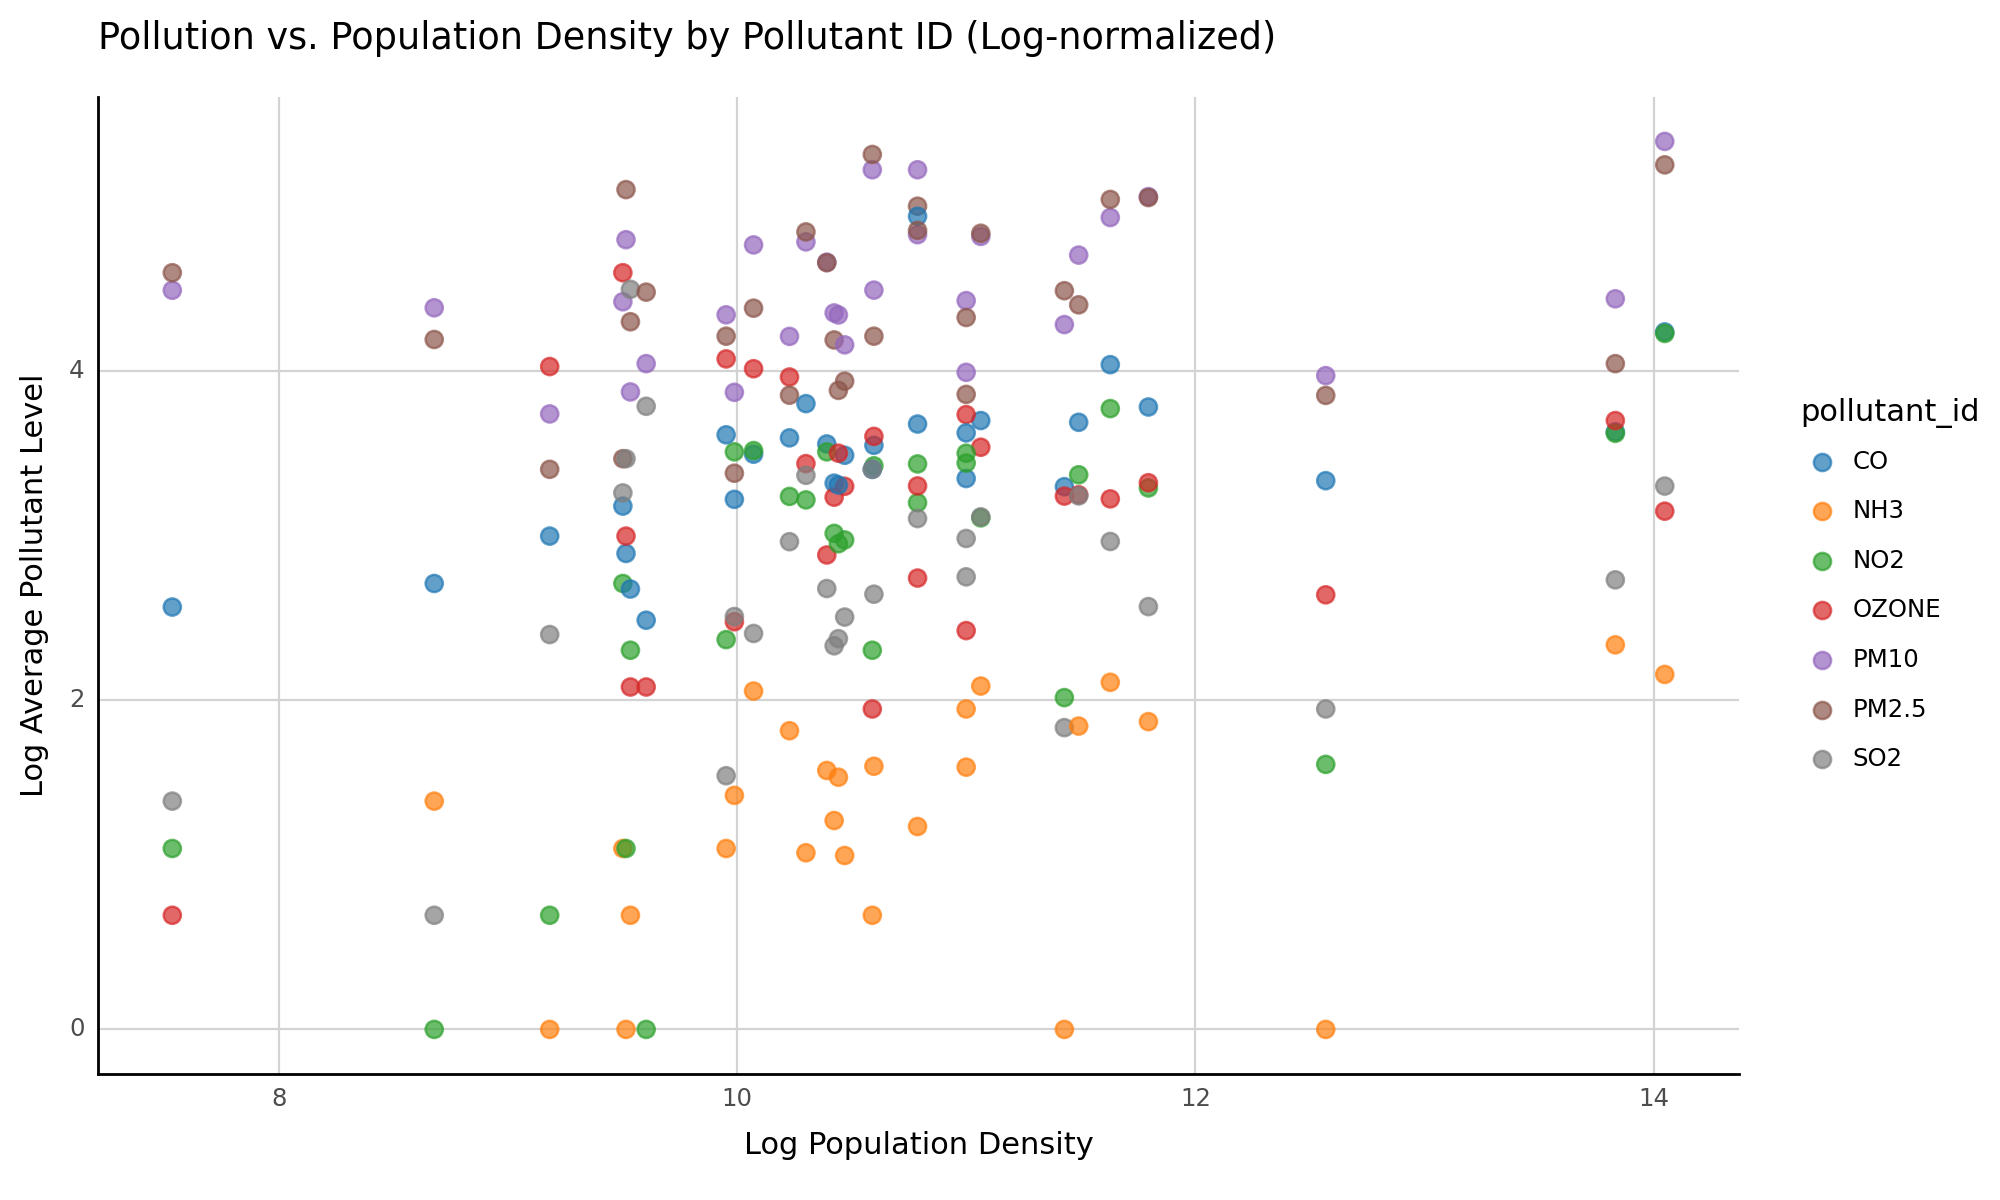

In [77]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, theme, element_line, element_blank, element_rect
import numpy as np

# Aggregate pollutant_avg values by state and pollutant_id, and calculate mean population density for each state
df_agg = df.groupby(['state', 'pollutant_id']).agg({'pollutant_avg': 'mean', 'population_density': 'mean'}).reset_index()

# Log-normalize the 'population_density' and 'pollutant_avg' columns
df_agg['population_density_log'] = np.log(df_agg['population_density'])
df_agg['pollutant_avg_log'] = np.log(df_agg['pollutant_avg'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

scatter_plot = (
    ggplot(df_agg, aes(x='population_density_log', y='pollutant_avg_log', color='pollutant_id')) +
    geom_point(size=3, alpha=0.7) +
    labs(title="Pollution vs. Population Density by Pollutant ID (Log-normalized)",
         x="Log Population Density",
         y="Log Average Pollutant Level") +
    scale_color_manual(values=colors) +
    theme_minimal() +
    theme(panel_grid_major=element_line(color="lightgray"),
          panel_grid_minor=element_blank(),
          panel_border=element_rect(color="black", fill=None),
          axis_line=element_line(color="black"),
          figure_size=(10, 6))
)

print(scatter_plot)


<ipython-input-78-2d3f03a07fc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-78-2d3f03a07fc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


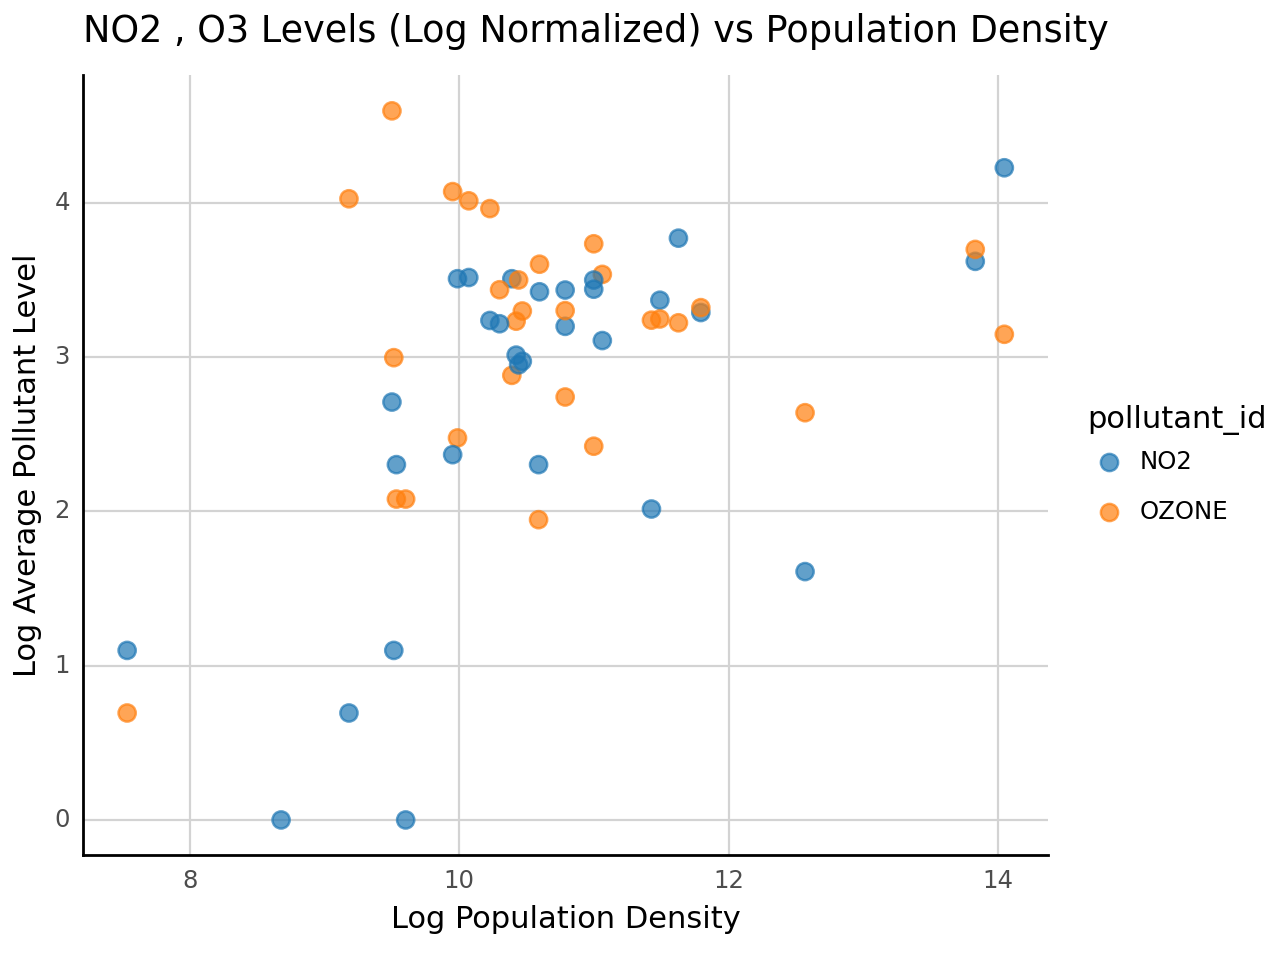

In [78]:
import numpy as np
df_no2_o3 = df_agg[df_agg['pollutant_id'].isin(['NO2', 'OZONE'])]

df_no2_o3['log_population_density'] = np.log(df_no2_o3['population_density'])
df_no2_o3['log_pollutant_avg'] = np.log(df_no2_o3['pollutant_avg'])

scatter_plot_log = (
    ggplot(df_no2_o3, aes(x='log_population_density', y='log_pollutant_avg', color='pollutant_id')) +
    geom_point(size=3, alpha=0.7) +
    labs(title="NO2 , O3 Levels (Log Normalized) vs Population Density", x="Log Population Density", y="Log Average Pollutant Level") +
    scale_color_manual(values=colors) +
    theme_minimal() +
    theme(panel_grid_major=element_line(color="lightgray"),
          panel_grid_minor=element_blank(),
          panel_border=element_rect(color="black", fill=None),
          axis_line=element_line(color="black"))
)
print(scatter_plot_log)


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


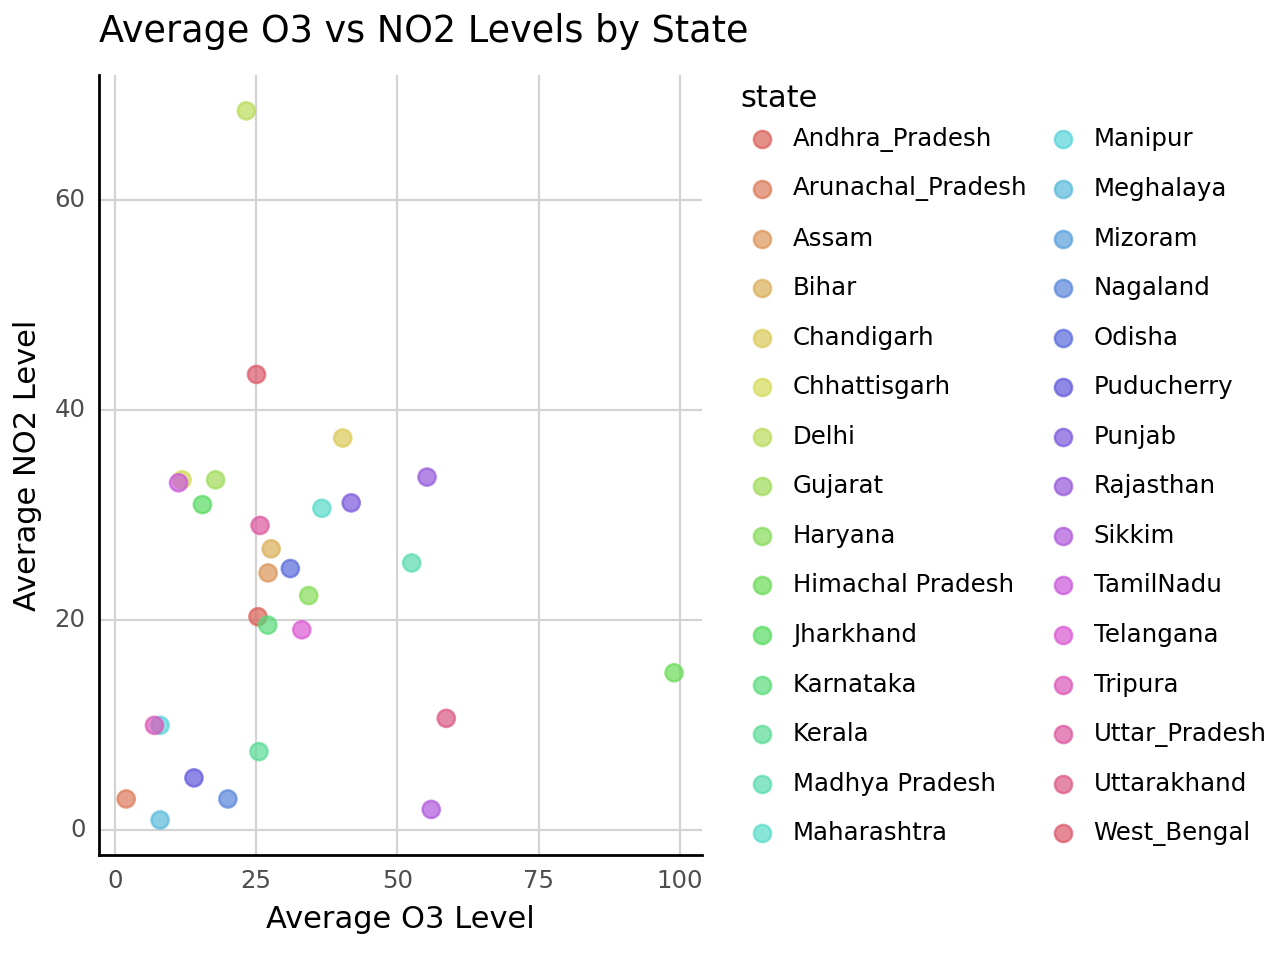


Correlation coefficient between O3 and NO2 levels: 0.03488441267417952


In [79]:

df_agg = df.groupby(['state', 'pollutant_id']).agg({'pollutant_avg': 'mean'}).reset_index()

df_no2_o3 = df_agg[df_agg['pollutant_id'].isin(['NO2', 'OZONE'])]
df_pivot = df_no2_o3.pivot(index='state', columns='pollutant_id', values='pollutant_avg').reset_index()

correlation_coefficient = df_pivot['OZONE'].corr(df_pivot['NO2'])
scatter_plot = (
    ggplot(df_pivot, aes(x='OZONE', y='NO2', color='state')) +
    geom_point(size=3, alpha=0.7) +
    labs(title="Average O3 vs NO2 Levels by State", x="Average O3 Level", y="Average NO2 Level") +
    scale_color_discrete() +
    theme_minimal() +
    theme(panel_grid_major=element_line(color="lightgray"),
          panel_grid_minor=element_blank(),
          panel_border=element_rect(color="black", fill=None),
          axis_line=element_line(color="black"))
)

print(scatter_plot)

print("Correlation coefficient between O3 and NO2 levels:", correlation_coefficient)


A correlation coefficient of 0.03 between Ozone (O3) and Nitrogen Dioxide (NO2) levels indicates a very weak positive linear relationship between the two pollutants across the states. Here are some insights that can be drawn from this correlation:

The positive correlation between O3 and NO2 levels with population density suggests different underlying mechanisms driving these relationships:

O3 and NO2 Levels with Population Density: The positive correlation between O3 and NO2 levels with population density indicates that areas with higher population density tend to experience higher levels of these pollutants. This could be attributed to increased human activities, such as transportation, industrial processes, and energy consumption, which lead to higher emissions of both NO2 and O3 precursors (e.g., nitrogen oxides and volatile organic compounds).

Lack of Correlation between O3 and NO2: The lack of correlation between O3 and NO2 levels suggests that their concentrations are influenced by different factors despite both being air pollutants. Ozone (O3) is a secondary pollutant formed through complex photochemical reactions involving precursor pollutants such as nitrogen oxides (NOx) and volatile organic compounds (VOCs) in the presence of sunlight. On the other hand, NO2 is a primary pollutant emitted directly from combustion processes, particularly from vehicles and industrial sources. The different sources and formation mechanisms of these pollutants may result in their independent variability and weak correlation with each other.

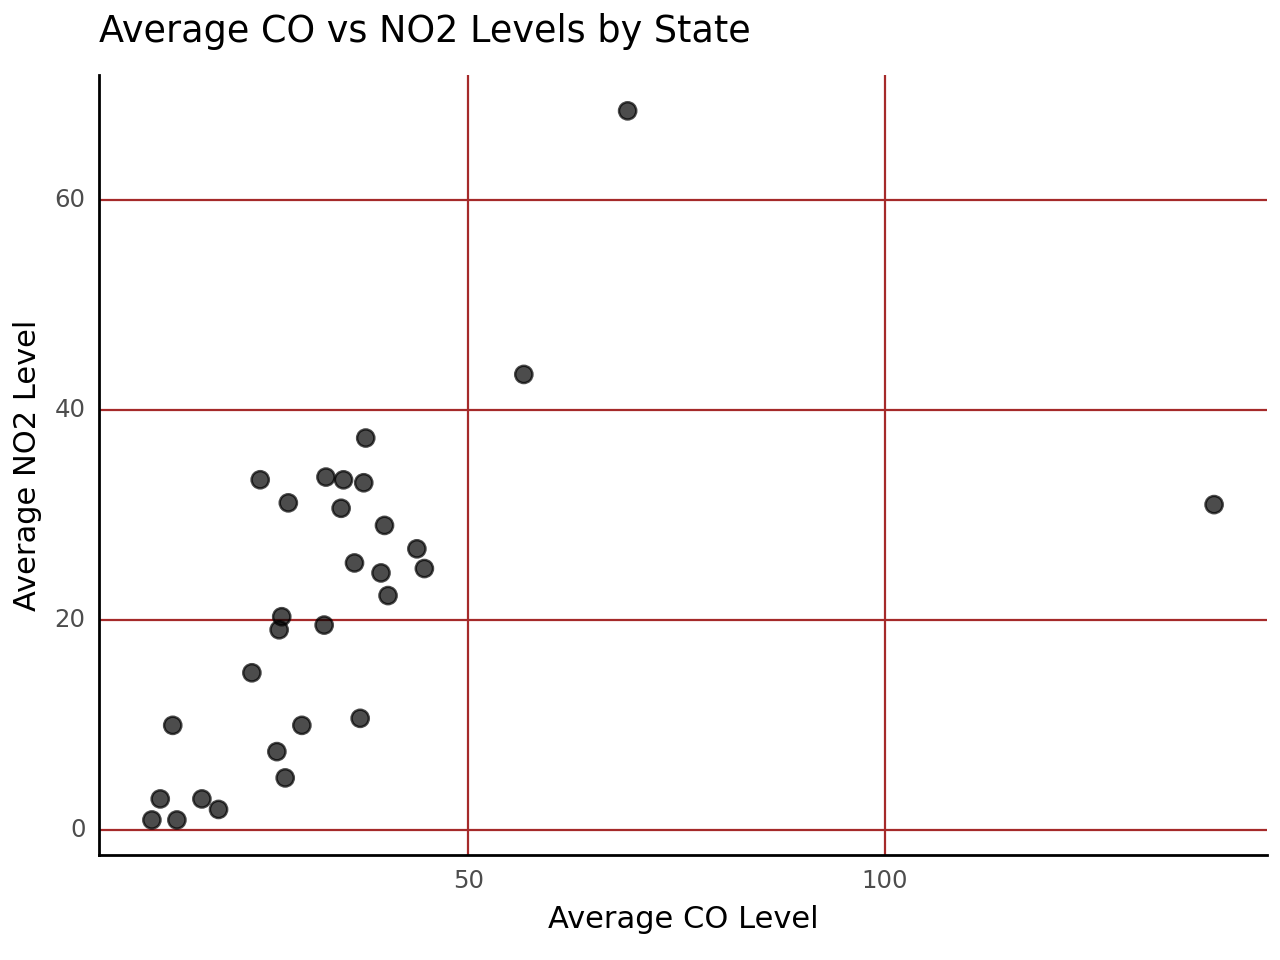


Correlation Coefficient between CO and NO2 levels: 0.5427528928227483


In [80]:


# Aggregate pollutant_avg values by state and pollutant_id
df_agg = df.groupby(['state', 'pollutant_id']).agg({'pollutant_avg': 'mean'}).reset_index()
df_co_no2 = df_agg[df_agg['pollutant_id'].isin(['CO', 'NO2'])]

df_pivot = df_co_no2.pivot(index='state', columns='pollutant_id', values='pollutant_avg').reset_index()

scatter_plot = (
    ggplot(df_pivot, aes(x='CO', y='NO2', color='state')) +
    geom_point(size=3, alpha=0.7, color='black') +
    labs(title="Average CO vs NO2 Levels by State", x="Average CO Level", y="Average NO2 Level") +
    scale_color_manual(values=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]) +  # Set custom colors for each state
    theme_minimal() +
    theme(panel_grid_major=element_line(color="brown"),
          panel_grid_minor=element_blank(),
          panel_border=element_rect(color="black", fill=None),
          axis_line=element_line(color="black"))
)

print(scatter_plot)
correlation_coefficient = df_pivot['CO'].corr(df_pivot['NO2'])

print("Correlation Coefficient between CO and NO2 levels:", correlation_coefficient)


A correlation coefficient of 0.54 between Carbon Monoxide (CO) and Nitrogen Dioxide (NO2) levels suggests a moderately positive linear relationship between the two pollutants across the states. Here are some insights that can be drawn from this correlation:

Traffic-Related Pollution: The moderate positive correlation indicates that there is a tendency for higher levels of CO to be associated with higher levels of NO2. Since both CO and NO2 are often emitted from vehicle exhaust and combustion processes, this correlation suggests that traffic-related pollution is a significant contributor to the observed levels of these pollutants.

Common Sources: CO and NO2 share common emission sources, such as automobiles, trucks, buses, and other combustion processes. The positive correlation between the two pollutants suggests that these sources are contributing to the simultaneous increase in CO and NO2 levels in the atmosphere.

In [81]:
cities_of_interest = ['Delhi', 'Bengaluru', 'Hyderabad', 'Chennai', 'Kolkata', 'Mumbai']
cities_of_interest_data = df[df['city'].isin(cities_of_interest)]






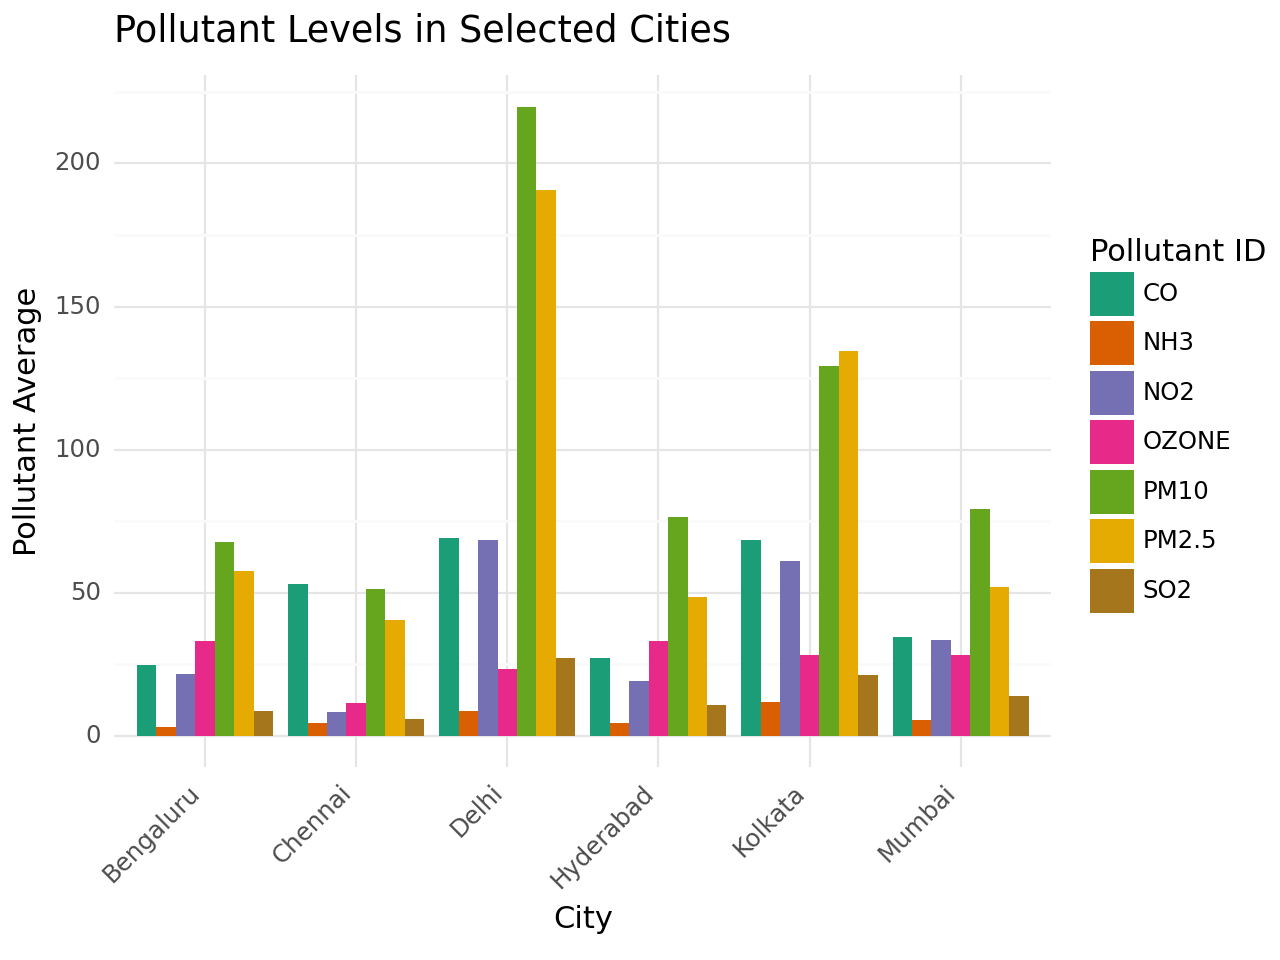

In [82]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, scale_fill_brewer

city_pollutant_avg = df.groupby(['city', 'pollutant_id'])['pollutant_avg'].mean().reset_index()

selected_cities_data = city_pollutant_avg[city_pollutant_avg['city'].isin(cities_of_interest)]

bar_plot = (
    ggplot(selected_cities_data, aes(x='city', y='pollutant_avg', fill='pollutant_id')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Pollutant Levels in Selected Cities', x='City', y='Pollutant Average', fill='Pollutant ID') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    scale_fill_brewer(type='qual', palette='Dark2')
)

print(bar_plot)



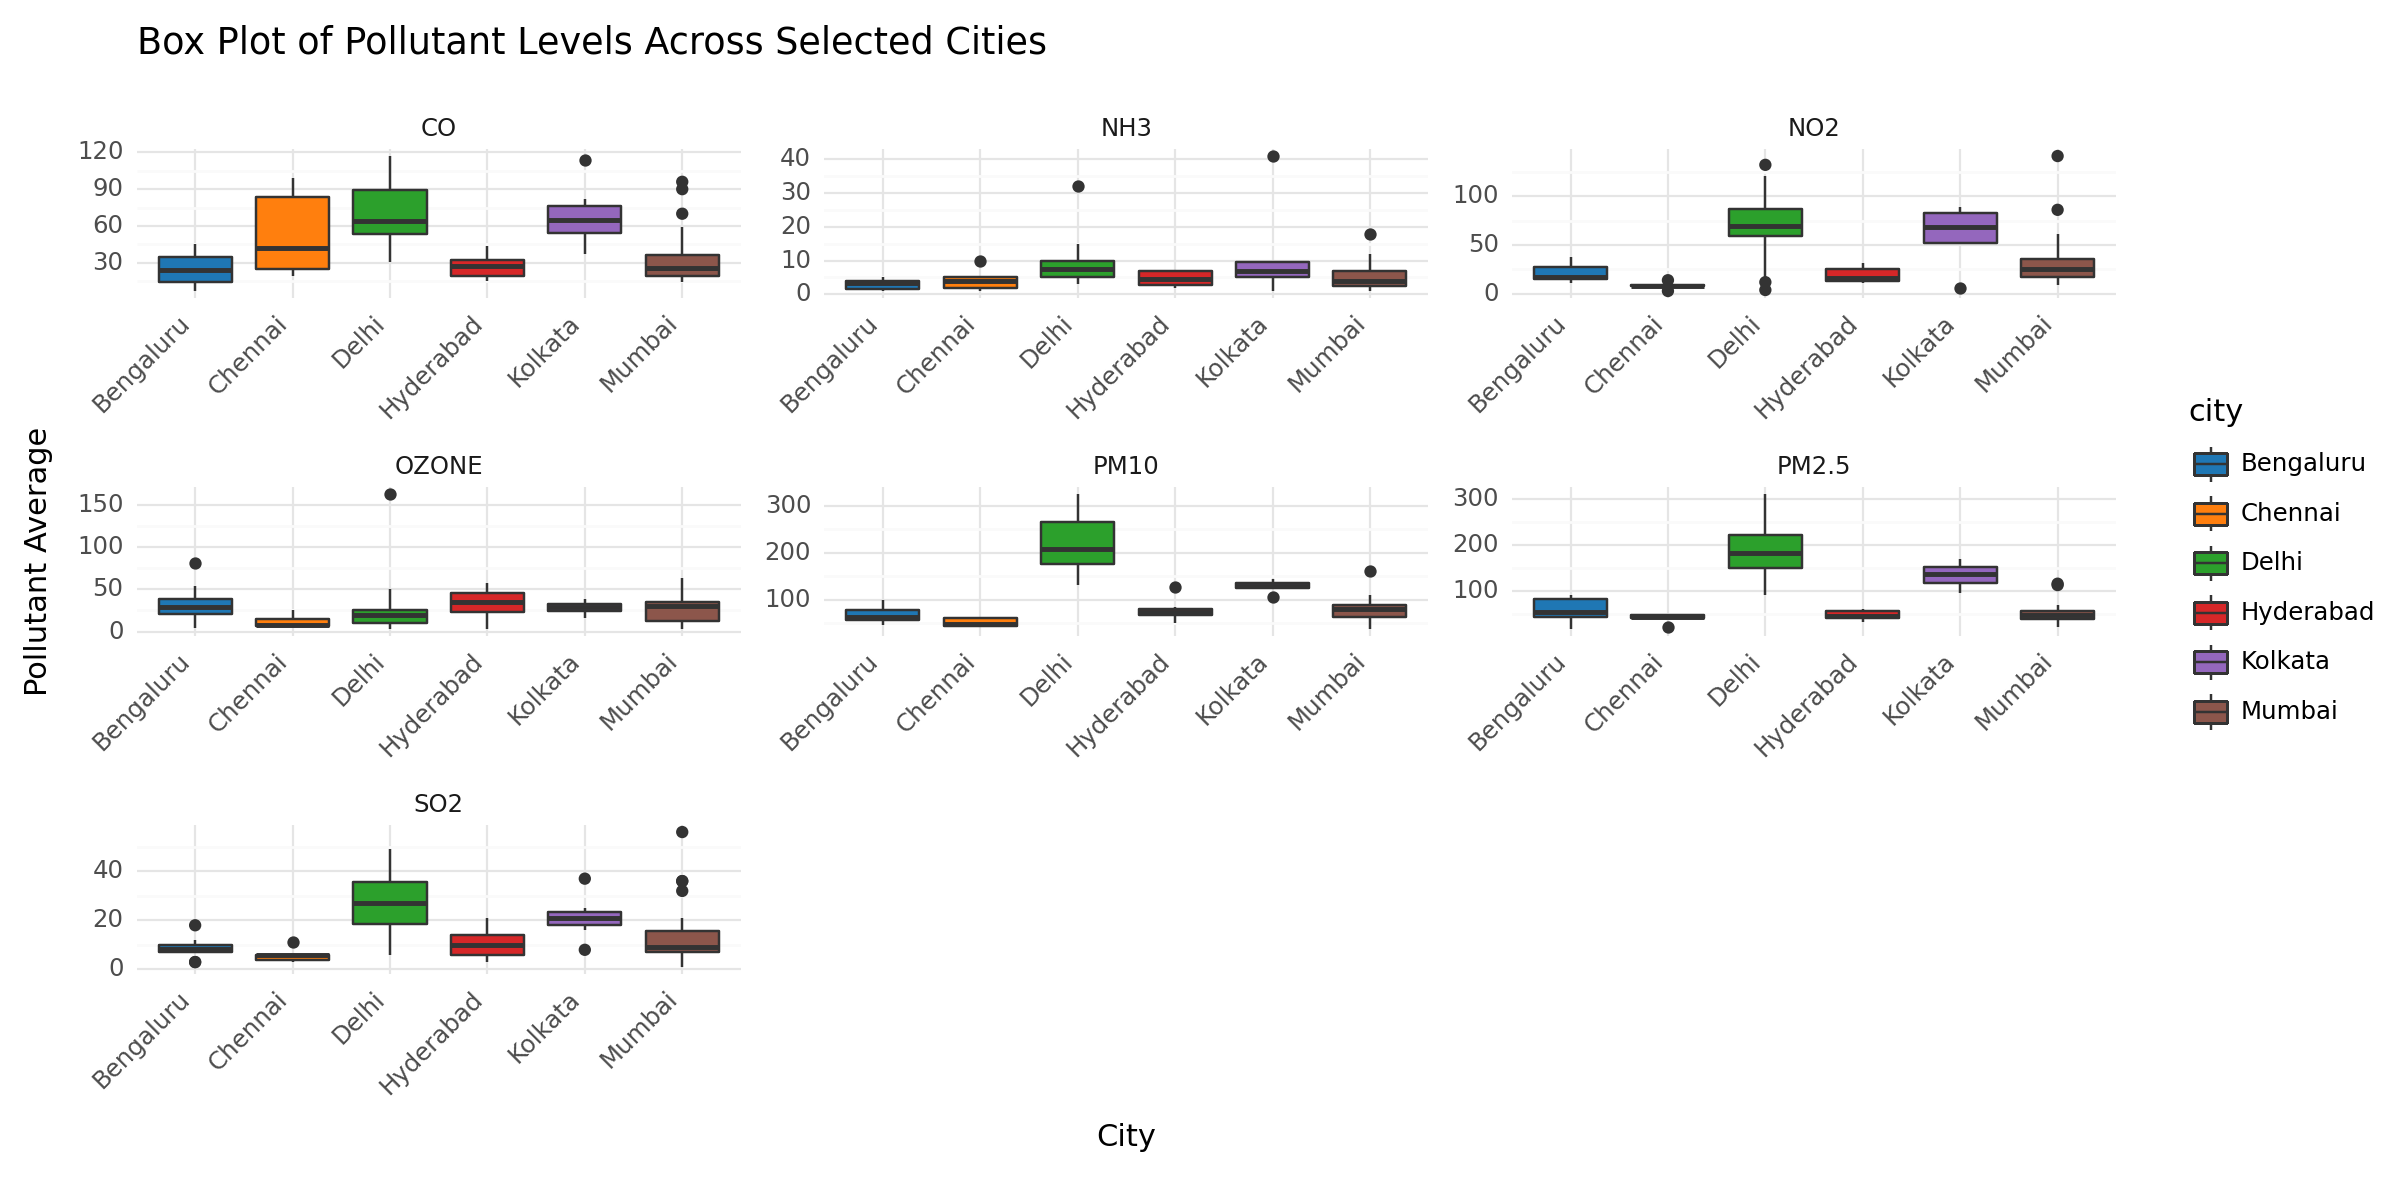

In [83]:
from plotnine import ggplot, aes, geom_boxplot, facet_wrap, labs, theme_minimal, theme, scale_fill_manual

selected_cities = ['Delhi', 'Bengaluru', 'Hyderabad', 'Chennai', 'Kolkata', 'Mumbai']
city_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

df_selected_cities = df[df['city'].isin(selected_cities)]

boxplot_cities_pollutants = (
    ggplot(df_selected_cities, aes(x='city', y='pollutant_avg', fill='city')) +
    geom_boxplot() +
    facet_wrap('~ pollutant_id', scales='free') +
    labs(title='Box Plot of Pollutant Levels Across Selected Cities', x='City', y='Pollutant Average') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    scale_fill_manual(values=city_colors) +
    theme(figure_size=(12, 6))
)

boxplot_cities_pollutants.draw()
